### Random eigenvalues of graphene and the triangulation of plane
In this notebook we verify some of the results presented in our article $\textit{Random eigenvalues of graphene and the triangulation of plane}$.
The reader finds important formulas derived in the mentioned paper followed by their implementation and verification.
Notions are the same as in the article.

Convergence of infinite expressions, like sums or integrals, is proved in the paper. Here, we their values are computed up to the fifth digit. 

Information about the article:

##### arXiv:

##### Authors: 
- Artur Bille, Ulm University, Germany, artur.bille@uni-ulm.de
- Victor Buchstaber, Steklov Mathematical Institute RAN & HSE University, International Laboratory of Algebraic Topology and Its Application, Russia, buchstab@mi-ras.ru
- Simon Coste, LPSM - Universite Paris-Cite, France, simon.coste@u-paris.fr
- Satoshi Kuriki, The Institute of Statistical Mathematics, Japan, kuriki@ism.ac.jp
- Evgeny Spodarev, Ulm University, Germany, evgeny.spodarev@uni-ulm.de

Needed packages:
- numpy,
- math,
- matplotlib.pyplot

Auxiliary or changed functions and constants:
- scipy.special.jv: Bessel function of the first kind of real order and complex argument.
- scipy.special.iv: Modified Bessel function of the first kind of real order.
- scipy.integrate.quad: This method integrates a function of one variable between two points.
- factorial(): Define $k!:=\infty$, if $-k\in\mathbb{N}$,
- choose_x(): Gives a random value in $[-2.5;2.5]$,
- check(): Print argument x, the result of two given functions and the absolute error.
- phi: Golden ratio


In [65]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

from scipy.special import jv
from scipy.special import iv
from scipy.integrate import quad

def factorial(k):
    if k<0:
        return np.inf
    else: 
        return math.factorial(k)
    
def choose_x():
    # Scale and shift factors, i.e., x is randomly chosen in [-shift,scale-shift]
    scale = 5
    shift = 2.5
    return np.random.rand(1)[0]*scale-shift

def check(func_lhs,func_rhs):
    x = choose_x()
    print("x =",x)
    res1 = func_lhs(x)
    res2 = func_rhs(x)
    print("Left-hand side: ",res1)
    print("Right-hand side: ",res2)
    print("Absolute Error: ",abs(res1-res2))
    
phi = (1+np.sqrt(5))/2

### 2.1 Regular lattices 
#### Definition 1
We call the infinite graph 
- $\mathcal{H}$ a $\textit{hexagonal lattice}$,  if its set of vertices is given by
\begin{align}\label{eq:V(h)}
V(\mathcal{H}):=\left\lbrace \left(\sqrt{3} x+\frac{y\sqrt{3}}{2},\frac{3y}{2} +c\right)^{\intercal}\in\mathbb{R}^2 ~\middle|~ x,y\in\mathbb{Z},  ~c\in\lbrace 0,1 \rbrace \right \rbrace,
\end{align}
and every vertex is connected with its three nearest neighbours (w.r.t. the Euclidean distance) by an edge;
- $\mathcal{T}$ a $\textit{triangular lattice}$,  if its set of vertices is given by
\begin{align*}
V(\mathcal{T}):=\left\lbrace v\in V(\mathcal{H})~\middle|~ c=0 \right \rbrace
\end{align*}
and every vertex is connected with its six nearest neighbours (w.r.t. the Euclidean distance) by an edge. 
- As a modification of $\mathcal{T}$, add a loop with  weight (?) 
$3$ to every vertex of $\mathcal{T}$ and denote the resulting lattice by $\mathcal{T}^*$. 
One can easily construct a bijection between the set of closed paths with even length $2k$ on $\mathcal{H}$ and the set of closed paths with length $k$ on $\mathcal{T}^*$. 

### 2.5 Properties of the spectral density of $\mathcal{H}$

#### Theorem 3
The random variable $X$ is absolutely continuously distributed with density
\begin{align}
f_{X}(x)=\int_0^{\infty} tx J_0(tx) J_0(t)^3 d t,\quad x\ge 0. 
\end{align}
#### Proposition 1
It holds
\begin{align*}
f_{X}(x) =\begin{cases}
\frac{2\sqrt{3}x}{\pi(3+x^2)}{}_2F_1\left( 
\begin{matrix} 
\frac{1}{3},\frac{2}{3} \\
1
\end{matrix};
\frac{x^2(9-x^2)^2}{(3+x^2)^3} \right),\quad &\text{ if }x\in [0,3],\\
0,&\text{ if }x>3,
\end{cases}
\end{align*}
where ${}_2F_1$ is the generalized hypergeometric function.

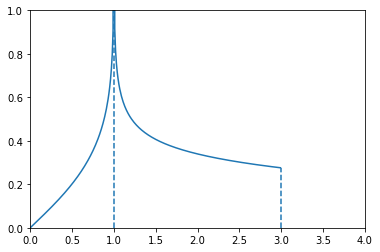

In [94]:
# The integral representation of f_X is numerically expensive to evaluate accurately.
# Instead use representation from Proposition 1, which is much faster.
def f_X(x):
    return np.where((x<0) | (x>3),0,2*np.sqrt(3)*x/np.pi/(3+x**2)*\
                    sc.hyp2f1(1/3,2/3,1,x**2*(9-x**2)**2/(3+x**2)**3))
        
# Plotting the graph of f_X using Proposition 1
x = np.arange(start = 0,stop = 3,step = 0.01)
plt.plot(x,f_X(x))
plt.ylim(bottom = 0,top=1)
plt.xlim(left = 0, right = 4)
plt.vlines(x = 1, ymin = 0, ymax = 1, linestyles='dashed')
plt.vlines(x = 3, ymin = 0, ymax = f_X(x[-1]), linestyles='dashed')
plt.show()

#### Proposition 3
For $k\in\mathbb{N}_0$, it holds
\begin{align} \label{eq:mu_H}
\mu_k\left(\mathcal{H}\right) &= \begin{cases}
\sum\limits_{k_1+k_2+k_3=k/2}\binom{k/2}{k_1,k_2,k_3}^2,\quad &\text{if }k \text{ is even},\\
0,&\text{if }k \text{ is odd,}
\end{cases}\\
\mu_k\left(\mathcal{T}^*\right) &= \sum\limits_{k_1+k_2+k_3=k}\binom{k}{k_1,k_2,k_3}^2.
\end{align}

### 3.3 Auxiliary results for modified Bessel functions
For $k\in\mathbb{N}_0$, define
\begin{align}
a_k:= \sum_{k_1+k_2+k_3=k}\binom{k}{k_1,k_2,k_3}^2.
\end{align}

Here, in order to compute $a_k$ for large $k$, we use the following recursion 

\begin{align}
a_{k+1} = \frac{10k^2+10k+3}{(k+1)^2}a_k-\frac{9k^2}{(k+1)^2}a_{k-1}, \quad k>1,
\end{align}
where $a_0 = 1$ and $a_1 = 3$. 

In [50]:
def a_k_recursive(k):
    a_k_vector = np.zeros(k)
    a_k_vector[0] = 1
    a_k_vector[1] = 3
    for k in range(2,k):
        a_k_vector[k] = int(np.round((10*(k-1)**2+10*(k-1)+3)/k**2*a_k_vector[k-1]-9*(k-1)**2/k**2*a_k_vector[k-2]))
    return a_k_vector

### Proofs

#### Proof of Theorem 4
##### Even Case:
For $x\in\mathbb{R}$, it holds
\begin{align}
H_1\left(x^2\right) &= \sum_{k=0}^\infty \frac{x^{2k}}{(2k)!}r_k = \cosh(3x)I_0^3(2x),\\
H_2\left(x^2\right) &= \sum_{k=0}^\infty \frac{x^{2k}}{(2k)!}s_k = 2\cosh(3x)\sum_{a=1}^\infty I_{2a}^3(2x),\\
H_3\left(x^2\right) &= \sum_{k=0}^\infty \frac{x^{2k}}{(2k)!}t_k = 2\sinh(3x)\sum_{a=0}^\infty I_{2a+1}^3(2x),\\
\end{align}
where
\begin{align}
r_k &= \sum_{k_1=0}^k \sum_{k_2=0}^{k-k_1}\sum_{k_4=0}^{k-k_1-k_2} \frac{3^{2k_1}(2k)!}{(k_2!)^2(k_4!)^2((k-k_1-k_2-k_4)!)^2(2k_1)!},\\
s_k &= 2\sum_{k_1=0}^k \sum_{k_2=0}^{k-k_1}\sum_{k_4=0}^{k-k_1-k_2} \sum_{n=0}^{k_2-1} \frac{3^{2k_1}(2k)!}{(2k_1)!n!(2k_2-n)!(k_4-k_2+n)!(k_4+k_2-n)!(k-k_1-2k_2-k_4+n)!(k-k_1-k_4-n)!},\\
t_k &= 2\sum_{k_1=0}^{k-1} \sum_{k_2=0}^{k-k_1-1}\sum_{k_4=0}^{k-k_1-k_2-1} \sum_{n=0}^{k_2} \frac{3^{2k_1+1}(2k)!}{(2k_1+1)!n!(2k_2-n+1)!(k_4-k_2+n)!(k_4+1+k_2-n)!(k-k_1-2k_2-k_4-2+n)!(k-k_1-k_4-1-n)!}.
\end{align}

In [13]:
def H1_short(x):
    return np.cosh(3*x)*sc.iv(0,2*x)**3

def H1_long(x):
    eps = 10**(-5)
    result = 0
    boo = True
    k = 0
    while boo:
        summand = 0
        for k1 in range(k+1):
            for k2 in range(k-k1+1):
                for k4 in range(k-k1-k2+1):
                    summand += 3**(2*k1)*x**(2*k)/factorial(k2)**2/factorial(k4)**2/factorial(k-k1-k2-k4)**2\
                    /factorial(2*k1)
        if summand < eps:
            boo = False
        k +=1
        result += summand
    return result

def H2_short(x):
    eps = 10**(-5)
    result = 0
    boo = True
    a = 1
    while boo:
        summand = sc.iv(2*a,2*x)**3
        if summand < eps:
            boo = False
        result += summand
        a += 1
    return result*2*np.cosh(3*x)

def H2_long(x):
    eps = 10**(-5)
    result = 0
    boo = True
    k = 0
    while boo:
        summand = 0
        for k1 in range(k+1):
            for k2 in range(k-k1+1):
                for k4 in range(k-k1-k2+1):
                    for n in range(k2):
                        summand += 2*3**(2*k1)*x**(2*k)/factorial(2*k1)/factorial(n)/factorial(2*k2-n)\
                        /factorial(k4-k2+n)/factorial(k4+k2-n)/factorial(k-k1-2*k2-k4+n)/factorial(k-k1-k4-n)
        if summand < eps and summand > 0:
            boo = False
        #print(summand)
        result += summand
        k += 1
    return result

def H3_short(x):
    eps = 10**(-5)
    result = 0
    boo = True
    a = 0
    while boo:
        summand = sc.iv(2*a+1,2*x)**3
        if abs(summand) < eps and abs(summand) > 0:
            boo = False
        result += summand
        a += 1
    return result*2*np.sinh(3*x)

def H3_long(x):
    eps = 10**(-5)
    result = 0
    boo = True
    k = 0
    while boo:
        summand = 0
        for k1 in range(k):
            for k2 in range(k-k1):
                for k4 in range(k-k1-k2):
                    for n in range(k2+1):
                        summand += 2*3**(2*k1+1)*x**(2*k)/factorial(2*k1+1)/factorial(n)/factorial(2*k2-n+1)\
                        /factorial(k4-k2+n)/factorial(k4+1+k2-n)/factorial(k-k1-2*k2-k4-2+n)/factorial(k-k1-k4-1-n)
        if summand < eps and summand > 0:
            boo = False
        result += summand
        k += 1
    return result

x = choose_x()
check(H1_short,H1_long,x)

x = -0.06112320806520444
Left-hand side:  1.0283098349795767
Right-hand side:  1.0283098293959383
Absolute Error:  5.583638440498362e-09


It holds
\begin{align*}
H(x^2) := \sum_{k=0}^\infty \frac{x^{2k}}{(2k)!}a_{2k} = H_1\left(x^2\right)+H_2\left(x^2\right)+H_3\left(x^2\right),
\end{align*}

In [53]:
def lhs(x):
    a_k_vector = a_k_recursive(10)
    result = 0
    eps = 10**(-5)
    k = 0
    boo = True
    while boo:
        if 2*k >= a_k_vector.shape[0]-1:
            a_k_vector = a_k_recursive(2*k+5)
        summand = x**(2*k)/factorial(2*k)*a_k_vector[2*k]
        if summand < eps:
            boo = False
        result += summand
        k +=1
    return result
        
def rhs(x):
    return H1_short(x)+H2_short(x)+H3_short(x)


check(lhs,rhs)

x = 0.24659142040726723
Left-hand side:  1.5662489707840002
Right-hand side:  1.566248994618216
Absolute Error:  2.3834215934215308e-08


##### Odd Case:
For $x\in\mathbb{R}$, it holds
\begin{align}
\widetilde{H}_1\left(x^2\right) &:= \sum_{k=0}^\infty \frac{x^{2k+1}}{(2k+1)!} \tilde{r}_k = \sinh\left(3x\right)I_0^3\left(2x\right),\\
\widetilde{H}_2\left(x^2\right) &:= \sum_{k=0}^\infty \frac{x^{2k+1}}{(2k+1)!} \tilde{t}_k 
= 2\sinh\left(3x\right)\sum_{n=1}^\infty I_{2n}^3\left(2x\right),\\
\widetilde{H}_3\left(x^2 \right) &:=\sum_{k=0}^{\infty} \frac{x^{2k+1}}{(2k+1)!}\tilde{s}_k = 2\cosh(3x)\sum_{a=0}^\infty I_{2a+1}^3(2x),\\
\end{align}
where
\begin{align}
\tilde{r}_k &= \sum_{k_1=0}^k \sum_{k_2=0}^{k-k_1}\sum_{k_4=0}^{k-k_1-k_2} \frac{3^{2k_1+1}(2k+1)!}{(k_2!)^2(k_4!)^2((k-k_1-k_2-k_4)!)^2(2k_1+1)!},\\
\tilde{t}_k &= 2\sum_{k_1=0}^{k} \sum_{k_2=0}^{k-k_1}\sum_{k_4=0}^{k-k_1-k_2} \sum_{n=0}^{k_2-1} \frac{3^{2k_1+1}(2k+1)!}{(2k_1+1)!n!(2k_2-n)!(k_4-k_2+n)!(k_4+k_2-n)!(k-k_1-2k_2-k_4+n)!(k-k_1-k_4-n)!},\\
\tilde{s}_k &= 2\sum_{k_1=0}^k \sum_{k_2=0}^{k-k_1}\sum_{k_4=0}^{k-k_1-k_2-1} \sum_{n=0}^{k_2} \frac{3^{2k_1}(2k+1)!}{(2k_1)!n!(2k_2+1-n)!(k_4-k_2+n)!(k_4+1+k_2-n)!(k-k_1-2k_2-k_4-1+n)!(k-k_1-k_4-n)!}.
\end{align}

In [14]:
def lhs(x):
    eps = 10**(-5)
    boo = True
    result = 0
    k = 0
    while boo:
        summand = 0
        for k1 in range(k+1):
            for k2 in range(k-k1+1):
                for k4 in range(k-k1-k2+1):
                    summand += x**(2*k+1)*3**(2*k1+1)/factorial(k2)**2/factorial(k4)**2/factorial(k-k1-k2-k4)**2\
                    /factorial(2*k1+1)
        if abs(summand) <= eps:
            boo = False
        result += summand
        k += 1
    return result

def rhs(x):
    return np.sinh(3*x)*sc.iv(0,2*x)**3

check(lhs,rhs,x)

x = -0.06112320806520444
Left-hand side:  -0.1864754153487279
Right-hand side:  -0.18647541563395315
Absolute Error:  2.8522523232155095e-10


It holds 
\begin{align}
& \lim_{b\to\infty}\mathbb{E}\left(\cos^j(X_b) \sin^k(X_b) \cos^l(\beta X_b) \sin^m(\beta X_b)\right) = \begin{cases}
 \displaystyle
 \frac{ j! k! l! m!}{(j+k)/2)!(j/2)!(k/2)!((l+m)/2)!(l/2)!(m/2)!2^{j+k+l+m}}, & j,k,l,m  \quad {\rm even}, \\
 0, & \mathrm{otherwise}.
 \end{cases}
\end{align}

In [95]:
def lhs(beta,j,k,l,m):
    eps = 10**(-10)
    N = 10**6
    b = 1
    X_b = np.random.rand(N)*b
    result = np.mean(np.cos(X_b)**j*np.sin(X_b)**k*np.cos(beta*X_b)**l*np.sin(beta*X_b)**m)
    boo = True
    while boo:
        b += 1
        X_b = np.random.rand(N)*b
        result_temp = np.mean(np.cos(X_b)**j*np.sin(X_b)**k*np.cos(beta*X_b)**l*np.sin(beta*X_b)**m)
        if abs(result-result_temp)<eps or b > 100:
            boo = False
        result = result_temp
    return result

def rhs(j,k,l,m):
    if np.mod(j,2)==0 and np.mod(k,2)==0 and np.mod(l,2)==0 and np.mod(m,2)==0:
        return factorial(j)*factorial(k)*factorial(l)*factorial(m)/factorial(int((j+k)/2))/factorial(int(j/2))\
    /factorial(int(k/2))/factorial(int((l+m)/2))/factorial(int(l/2))/factorial(int(m/2))/2**(j+k+l+m)
    else:
        return 0
    
print("Even case:")
j = 2*np.random.randint(5)
k = 2*np.random.randint(5)
l = 2*np.random.randint(5)
m = 2*np.random.randint(5)
print("j = "+str(j)+", k = "+str(k)+", l = "+str(l)+", m = "+str(m))
res1 = lhs(phi,j,k,l,m)
res2 = rhs(j,k,l,m)
print("Left-hand side:  ",res1)
print("Right-hand side: ",res2)
print("Delta:           ",abs(res1-res2))

print("------------")

j = np.random.randint(5)
k = np.random.randint(5)
l = np.random.randint(5)
m = np.random.randint(5)
print("j = "+str(j)+", k = "+str(k)+", l = "+str(l)+", m = "+str(m))
res1 = lhs(phi,j,k,l,m)
res2 = rhs(j,k,l,m)
print("Left-hand side:  ",res1)
print("Right-hand side: ",res2)
print("Delta:           ",abs(res1-res2))

Even case:
j = 6, k = 8, l = 6, m = 0
Left-hand side:   0.0007489939430360611
Right-hand side:  0.000762939453125
Delta:            1.3945510088938877e-05
------------
j = 1, k = 3, l = 3, m = 0
Left-hand side:   0.00090777752733185
Right-hand side:  0
Delta:            0.00090777752733185
